# Tungsten Bombardment Spectroscopy Results

### Description
Spectroscopic data taken with the ocean optics spectrometer using a fiber lense aimed directly in front of the probe target surface upstream relative to the plasma flow direction. 

### Plasma Parameters
RF Power: 1.6kW
Magnetic Field Current: 160A
Magnetic Field: 500G
Source Gas: Argon
Gas Flow Rate: 25sccm
Pressure Transducer 1: 1.94mTorr
Pressure Transducer 1: 3.34mTorr

### Spectrometer Parameters
Model: Ocean Optics
Run1 Integration Time: 200ms
Run2 Integration Time: 600ms
Averaging Scans: 1

In [1]:
run = int(input("Enter Run Number (1 or 2):"))
bias_select = []
if run == 1:
    runpath = '..\\..\\2  Data\\3  Ocean Optics Spectrometer\\2016_08_31\spec_*.txt'
    savepath= '..\\..\\3  Results\\3  Spectroscopy Results\\Bombardment\\Run1Results\\'
    backshot = 'spec_0005' # Background Shot
    shot = 'spec_0025' # No Bias Background
    bs = ['bias_0', 'bias_10', 'bias_20', 'bias_30', 'bias_40', 'bias_50', 'bias_60', 'bias_70', 'bias_80']
    bias_00 = 'spec_0060'
    bias_10 = 'spec_0080'
    bias_20 = 'spec_0100'
    bias_30 = 'spec_0120'
    bias_40 = 'spec_0140'
    bias_50 = 'spec_0160'
    bias_60 = 'spec_0180'
    bias_70 = 'spec_0220'
    bias_80 = 'spec_0258'
    bias_00 = 'spec_0060'
    bias_select.append(['spec_0060','spec_0080''spec_0100','spec_0120','spec_0140','spec_0160','spec_0180','spec_0200','spec_0240'])
elif run == 2:
    runpath = '..\\..\\2  Data\\3  Ocean Optics Spectrometer\\2016_08_31\spec2_*.txt'
    savepath= '..\\..\\3  Results\\3  Spectroscopy Results\\Bombardment\\Run2Results\\'
    backshot = 'spec2_0005' # Background Shot
    shot = 'spec2_0065' # No Bias Background
    bs = ['bias_0', 'bias_50', 'bias_60', 'bias_70', 'bias_80']
    bias_00 = 'spec2_0000'
    bias_10 = 'spec2_0000'
    bias_20 = 'spec2_0000'
    bias_30 = 'spec2_0000'
    bias_40 = 'spec2_0000'
    bias_50 = 'spec2_0055'
    bias_60 = 'spec2_0045'
    bias_70 = 'spec2_0035'
    bias_80 = 'spec2_0025'
    bias_select.append(['spec2_0055','spec2_0045','spec2_0035','spec2_0025'])
print 'Displaying Data for Run %d' % run

Enter Run Number (1 or 2):1
Displaying Data for Run 1


In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
import json, os, glob, csv, json, sys
s = json.load(open('..\\7  Notebook Config Files\\bmh_matplotlibrc.json') )

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update(s)

def css_styling():
    styles = open('..\\7  Notebook Config Files\\custom.css', "r").read()
    return HTML(styles)
css_styling()

import numpy as np
import math as m
from tqdm import tqdm
from scipy import signal
from PyQt4 import QtGui

figsize(16,9)

In [3]:
def WIread(path):
    reader = csv.reader(open(path),delimiter='\n')
    result = np.array(list(reader))
    wavelength = []
    intensity = []
    for i in range(18,len(result)-1):
        tmp = result[i]
        dat = tmp[0].split('\t')
        w = float(dat[0])
        i = float(dat[1])
        wavelength.append(w)
        intensity.append(i)
    return wavelength, intensity

def Vdiv(num,run):
    if run == 1:
        shotsperv = 20
        if 60 < num < 79:
            v = 0
        elif 80 < num < 99:
            v = 10
        elif 100 < num < 119:
            v = 20
        elif 120 < num < 139:
            v = 30
        elif 140 < num < 159:
            v = 40
        elif 160 < num < 179:
            v = 50
        elif 180 < num < 199:
            v = 60
        elif 220 < num < 239:
            v = 70
        elif 240 < num < 259:
            v = 80
        else:
            v = -1    
    elif run ==2:
        shotsperv = 10
        if 10 < num < 19:
            v = 0
        elif 50 < num < 59:
            v = 50
        elif 40 < num < 49:
            v = 60
        elif 30 < num < 39:
            v = 70
        elif 20 < num < 29:
            v = 80
        else:
            v = -1   
    else:
        print "ERROR: Enter Valid Run"
    return v,shotsperv

def WIplot(wavelength,intensity,title,vline):
    fig = plt.plot(wavelength,intensity,'c')
    plt.xlim(m.floor(min(wavelength,key=float))-10,m.ceil(max(wavelength,key=float))+10)
    plt.title(title)
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Intensity')
    if vline == True:
        plt.axvline(352.38,color='r',linestyle='--')
        #plt.axvline(351.32,color='r',linestyle='--')
        plt.axvline(507.8,color='r',linestyle='--')
        plt.axvline(361.72,color='r',linestyle='--')
    plt.savefig(savepath + title + '.png')
    plt.show()
    

def WIplotr(wavelength,intensity,title):
    plot = plt.plot(wavelength,intensity,'c')
    plt.xlim(int(m.floor(min(wavelength,key=float)))-10,600)#int(m.ceil(max(wavelength)))+10)
    plt.title(title)
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Intensity')
    plt.savefig(savepath + title + '.png')
    return plot

In [4]:
specs = {}
paths = glob.glob(runpath)
for path in tqdm(paths):
    [wavelength, intensity] = WIread(path)
    specs[path.split('\\')[-1].split('.txt')[0]] = WIread(path)

100%|████████████████████████████████████████| 292/292 [00:06<00:00, 47.40it/s]


In [5]:
print specs.keys()

['spec_0171', 'spec_0170', 'spec_0173', 'spec_0172', 'spec_0175', 'spec_0174', 'spec_0177', 'spec_0176', 'spec_0179', 'spec_0178', 'spec_0246', 'spec_0274', 'spec_0228', 'spec_0190', 'spec_0234', 'spec_0279', 'spec_0244', 'spec_0288', 'spec_0275', 'spec_0104', 'spec_0105', 'spec_0106', 'spec_0107', 'spec_0100', 'spec_0101', 'spec_0102', 'spec_0103', 'spec_0258', 'spec_0108', 'spec_0109', 'spec_0256', 'spec_0162', 'spec_0163', 'spec_0160', 'spec_0161', 'spec_0166', 'spec_0167', 'spec_0164', 'spec_0165', 'spec_0283', 'spec_0168', 'spec_0169', 'spec_0272', 'spec_0202', 'spec_0085', 'spec_0084', 'spec_0087', 'spec_0086', 'spec_0081', 'spec_0080', 'spec_0083', 'spec_0082', 'spec_0089', 'spec_0088', 'spec_0264', 'spec_0257', 'spec_0250', 'spec_0273', 'spec_0251', 'spec_0078', 'spec_0079', 'spec_0249', 'spec_0248', 'spec_0252', 'spec_0070', 'spec_0071', 'spec_0072', 'spec_0073', 'spec_0074', 'spec_0075', 'spec_0076', 'spec_0077', 'spec_0157', 'spec_0156', 'spec_0155', 'spec_0154', 'spec_0153'

In [6]:
bias = {}
for spec in specs:
    code = spec.split('_')[1]
    num = int(code)
    v,shotsperv = Vdiv(num,run)
    varstr = 'bias_%d' % v
    bias[varstr] = [0] * len(specs[spec][0])

for spec in specs:
    code = spec.split('_')[1]
    num = int(code)
    v,shotsperv = Vdiv(num,run)
    varstr = 'bias_%d' % v
    N = len(specs[spec][0])
    sarray = specs[spec][1]

    for i in range(N):
        bias[varstr][i] = bias[varstr][i] + sarray[i]

bias.pop('bias_-1')
        
for b in bias:
    bias[b][:] = [x / shotsperv for x in bias[b]]

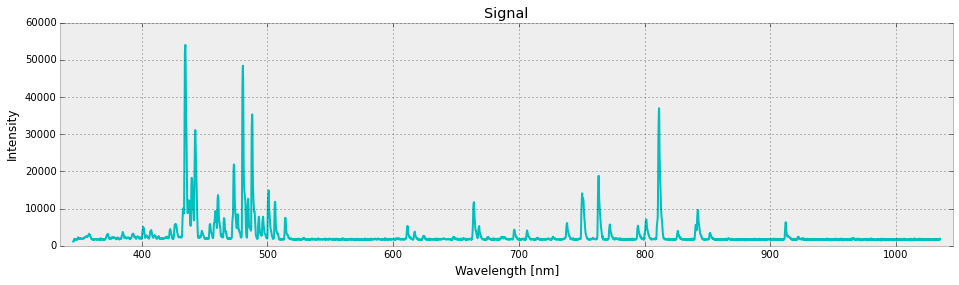

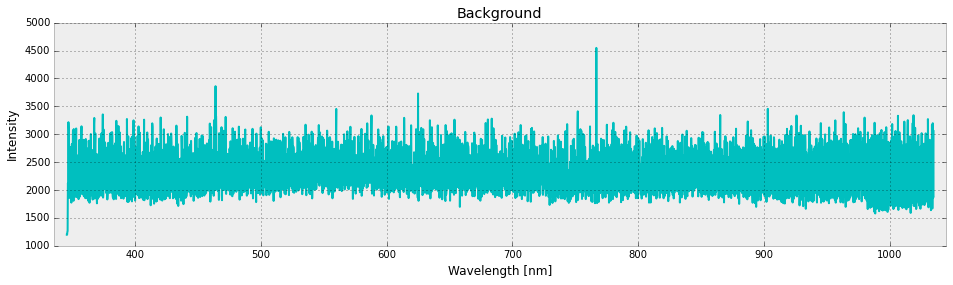

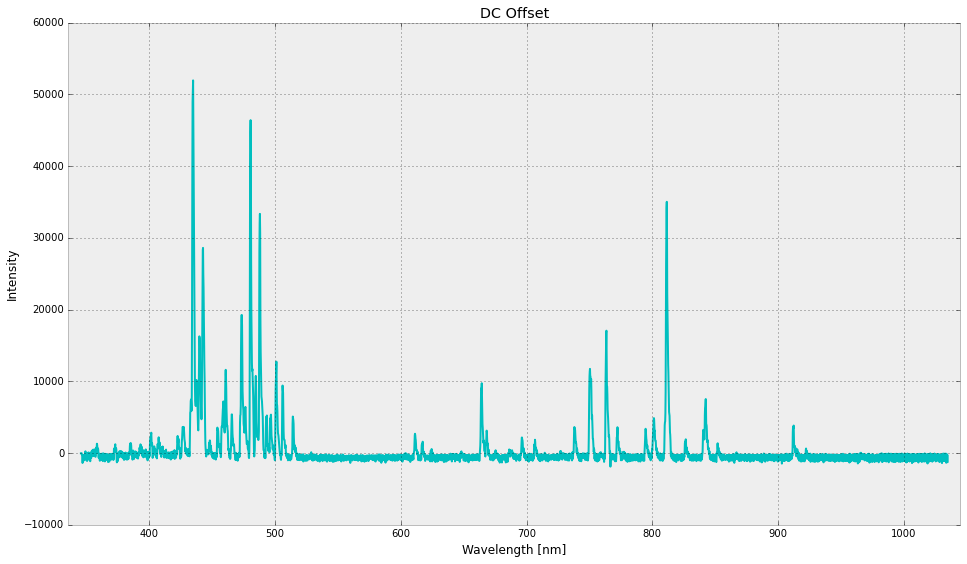

In [7]:
background = specs[backshot]
foreground = specs[shot]
bi = background[1]
w = foreground[0]
I = foreground[1]
bsi = []
for i in range(len(w)):
    bsi.append(I[i]-bi[i])

figsize(16, 4)
WIplot(w,I, 'Signal',False)
WIplot(w,bi,'Background',False)
figsize(16, 9)
WIplot(w,bsi,'DC Offset',False)

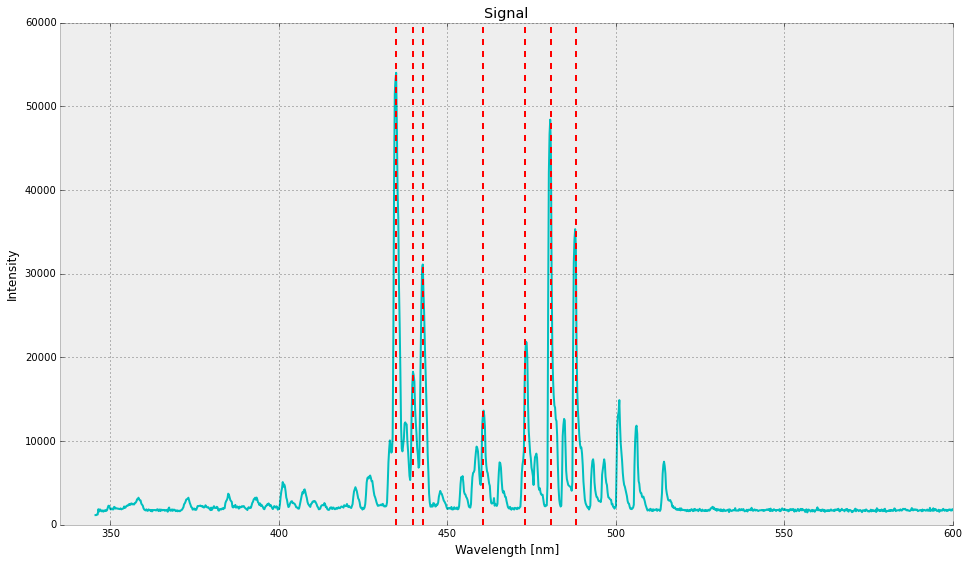

In [8]:
def ARplot(wavelength,intensity,title,vline):
    plt.plot(wavelength,intensity,'c')
    plt.xlim(m.floor(min(wavelength,key=float))-10,600)
    plt.title(title)
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Intensity')
    if vline == True:
        plt.axvline(434.81,color='r',linestyle='--')
        plt.axvline(442.92,color='r',linestyle='--')
        plt.axvline(439.8,color='r',linestyle='--')
        plt.axvline(480.75,color='r',linestyle='--')
        plt.axvline(488.15,color='r',linestyle='--')
        plt.axvline(472.93,color='r',linestyle='--')
        plt.axvline(460.54,color='r',linestyle='--')
    plt.savefig(savepath + 'ArPeaks.png')
    plt.show()
ARplot(w,I, 'Signal',True)

Arpeaks = [434.81,439.8,442.92,460.54,472.93,480.75,487.94]

In [9]:
'''
for i in range(1,100):
    Arw = w[I.index(max(I))]
    if Arw < 600:
        print Arw
        I[I.index(max(I))] = 0
    else:
        I[I.index(max(I))] = 0
'''

'\nfor i in range(1,100):\n    Arw = w[I.index(max(I))]\n    if Arw < 600:\n        print Arw\n        I[I.index(max(I))] = 0\n    else:\n        I[I.index(max(I))] = 0\n'

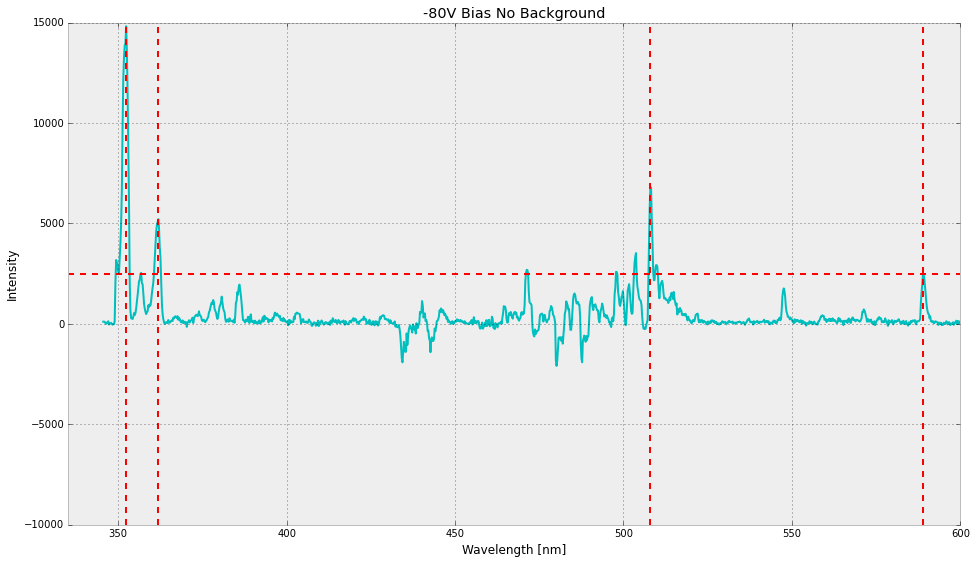

In [10]:
bsi = []
for i in range(len(specs[bias_80][1])):
    I = specs[bias_80][1]
    bi = specs[bias_00][1]
    bsi.append(I[i] - bi[i])
title = '-80V Bias No Background'
WIplotr(w,bsi,title)
plt.axvline(352.38,color='r',linestyle='--')
#plt.axvline(351.32,color='r',linestyle='--')
plt.axvline(507.8,color='r',linestyle='--')
plt.axvline(361.72,color='r',linestyle='--')
plt.axvline(588.86,color='r',linestyle='--')
plt.axhline(2500,color='r',linestyle='--')
plt.savefig(savepath + title + '.png')
peaks = [352.38,361.72,507.8,588.86]

for i in range(1,30):
    #print w[bsi.index(max(bsi))]
    bsi[bsi.index(max(bsi))] = 0

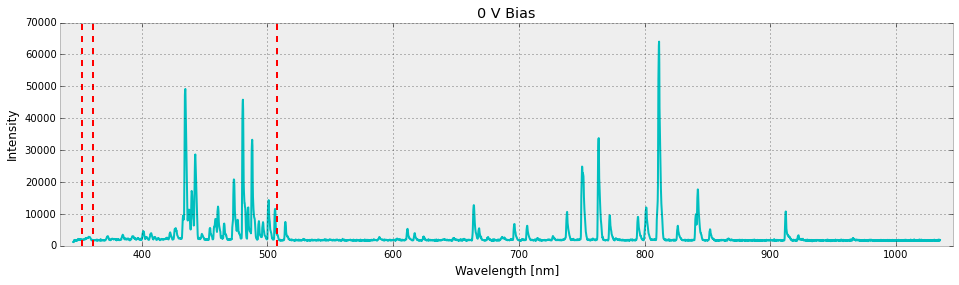

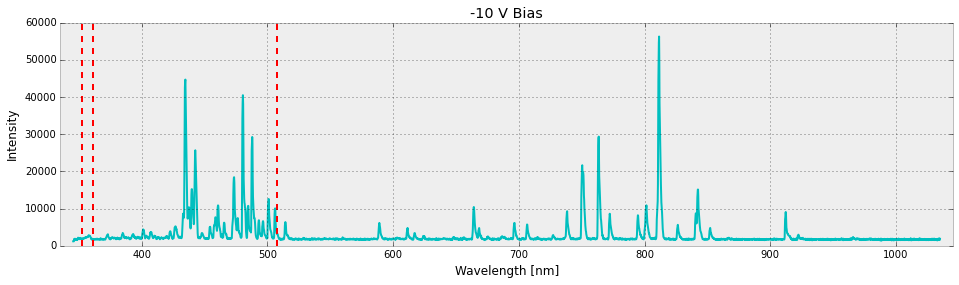

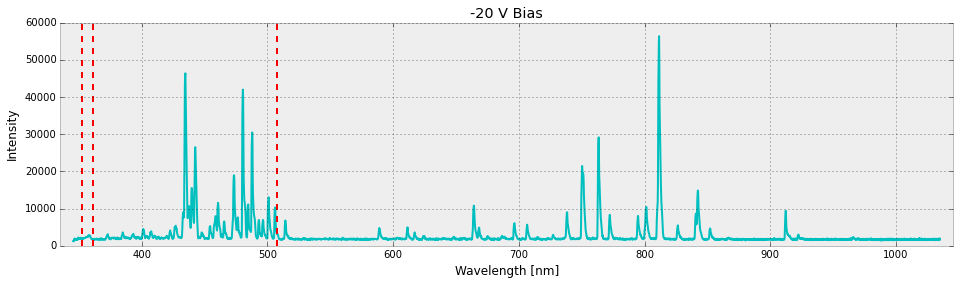

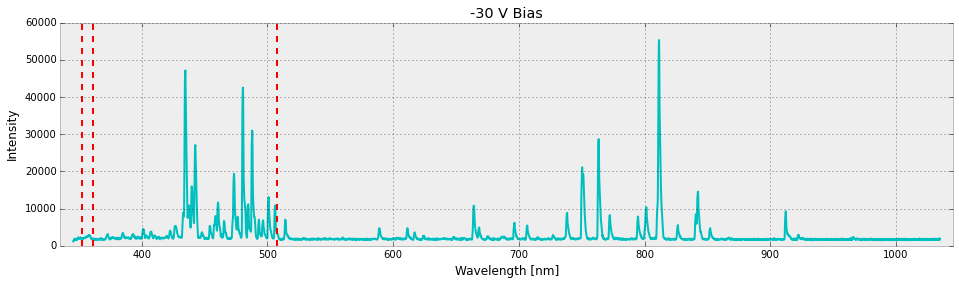

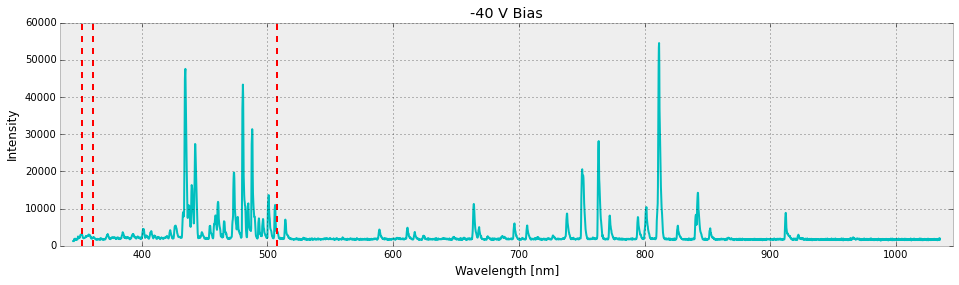

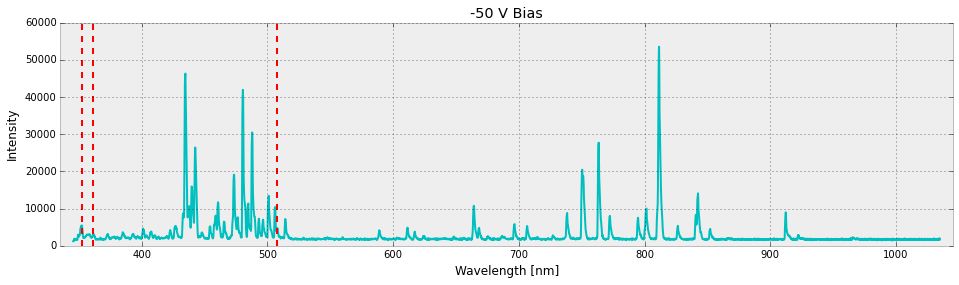

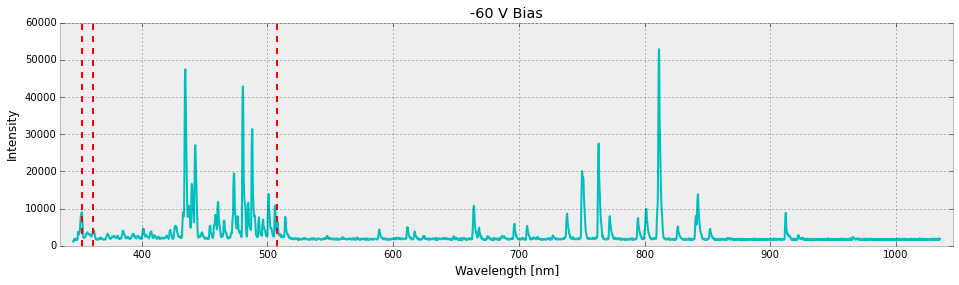

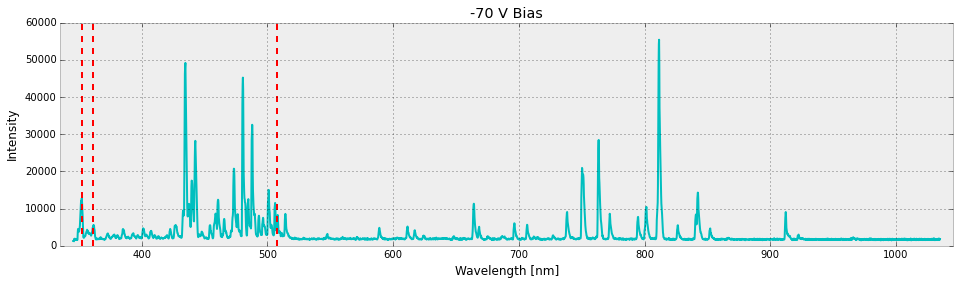

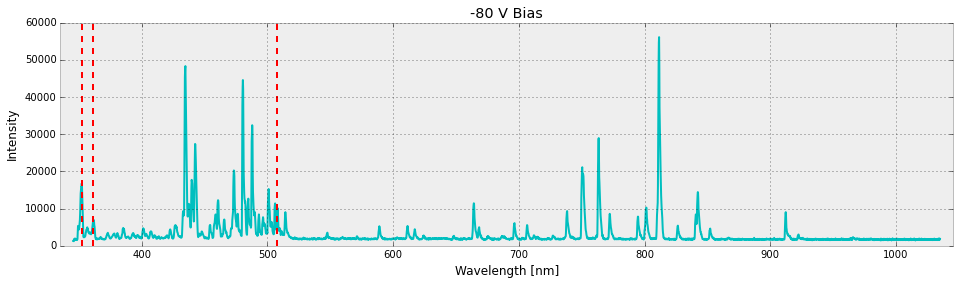

In [11]:
figsize(16,4)
WIplot(w,specs[bias_00][1],'0 V Bias',True)
WIplot(w,specs[bias_10][1],'-10 V Bias',True)
WIplot(w,specs[bias_20][1],'-20 V Bias',True)
WIplot(w,specs[bias_30][1],'-30 V Bias',True)
WIplot(w,specs[bias_40][1],'-40 V Bias',True)
WIplot(w,specs[bias_50][1],'-50 V Bias',True)
WIplot(w,specs[bias_60][1],'-60 V Bias',True)
WIplot(w,specs[bias_70][1],'-70 V Bias',True)
WIplot(w,specs[bias_80][1],'-80 V Bias',True)

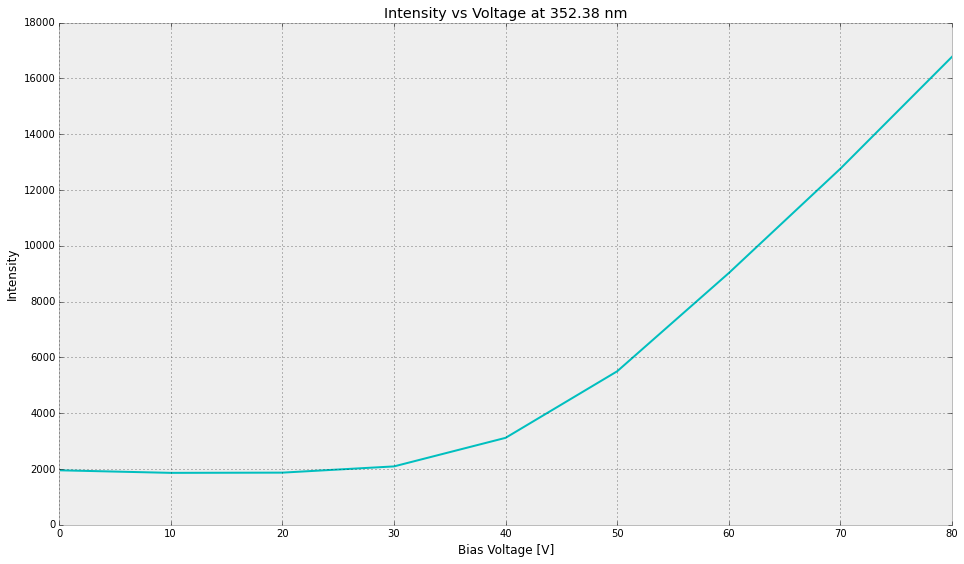

In [12]:

bspecs = [bias_00,bias_10,bias_20,bias_30,bias_40,bias_50,bias_60,bias_70,bias_80]

wW = []
V = np.linspace(0,80,9)
for spec in bspecs:
    intensity = specs[spec][1]
    peak = peaks[0]
    wW.append(intensity[w.index(peak)])
title = 'Intensity vs Voltage at %.2f nm' % peak
figsize(16, 9)
plt.plot(V,wW,'c')
plt.title(title)
plt.xlabel('Bias Voltage [V]')
plt.ylabel('Intensity')
plt.savefig(savepath +'Bias352nmWLine.png')
plt.show()

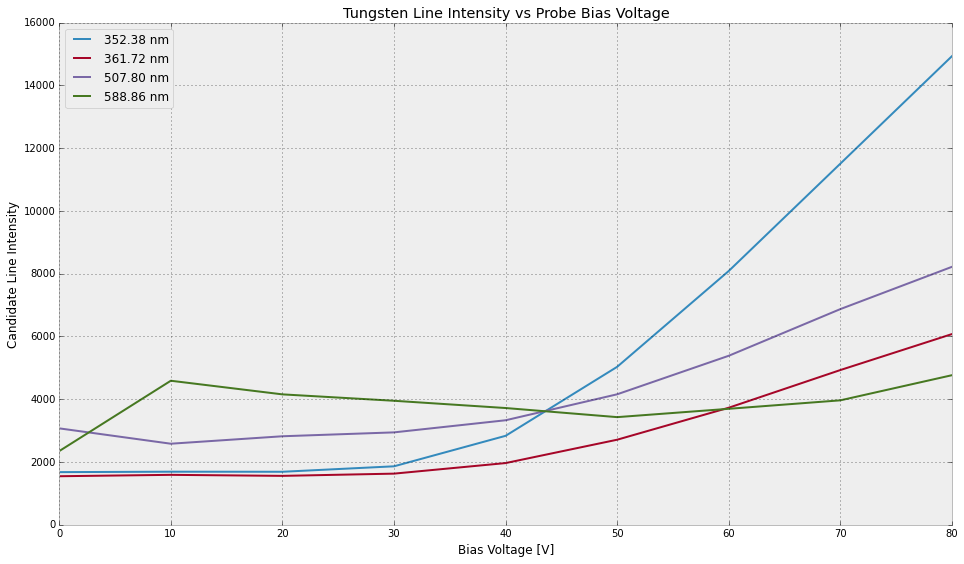

In [13]:
def pltpeak(V,wW,peak):
    figsize(16, 9)
    title = 'Tungsten Line Intensity vs Probe Bias Voltage'
    plt.plot(V,wW)
    plt.title(title)
    plt.xlabel('Bias Voltage [V]')
    plt.ylabel('Candidate Line Intensity')

lstr = []
for peak in peaks:
    wW = []
    V = np.linspace(0,80,len(bs))
    for b in bs:
        intensity = bias[b]
        wW.append(intensity[w.index(peak)])
    pltpeak(V,wW,peak)

    lstr.append('%0.2f nm' % peak)
    plt.legend(lstr,loc='upper left')    
plt.savefig(savepath + 'BiasWILines.png')
plt.show()

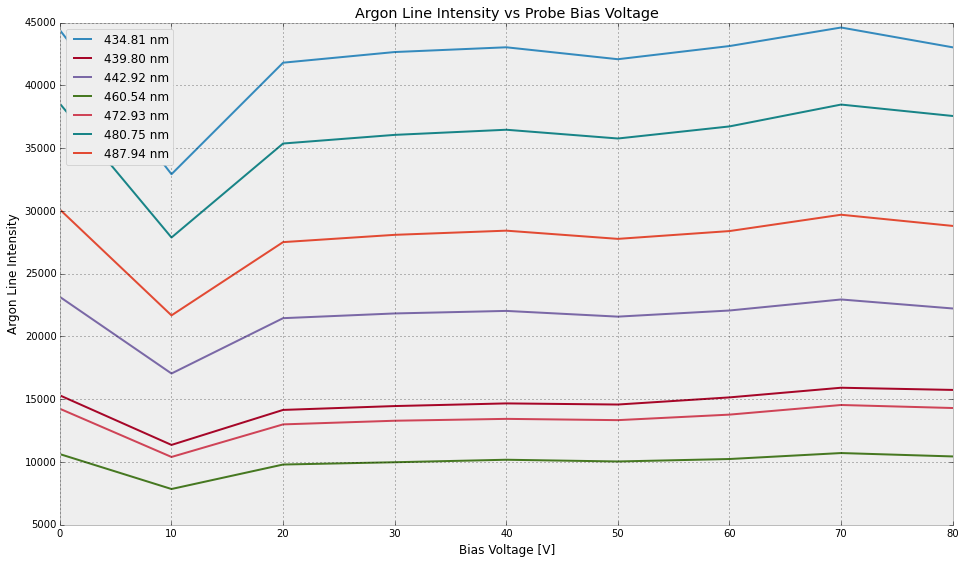

In [14]:
def pltARpeak(V,wW,peak):
    figsize(16, 9)
    title = 'Argon Line Intensity vs Probe Bias Voltage'
    Arp = plt.plot(V,wW)
    plt.title(title)
    plt.xlabel('Bias Voltage [V]')
    plt.ylabel('Argon Line Intensity')

lstr = []
for peak in Arpeaks:
    wW = []
    V = np.linspace(0,80,len(bs))
    for b in bs:
        intensity = bias[b]
        wW.append(intensity[w.index(peak)])
    pltARpeak(V,wW,peak)
    
    lstr.append('%0.2f nm' % peak)
    plt.legend(lstr,loc='upper left')    
plt.savefig(savepath + 'BiasArLines.png')
plt.show()

<footer>
  <p>Created by: Kyle Adriany</p>
  <p>Contact information: <a href="mailto:kyle.adriany@gmail.com">
    kyle.adriany@gmail.com</a>.</p>
    
    <p>Copyright © 2016 Kyle Adriany</p>
    
    <p>The MIT License (MIT)</p>
    

 <p>Permission is hereby granted, free of charge, to any person obtaining a copy
 of this software and associated documentation files (the "Software"), to deal
 in the Software without restriction, including without limitation the rights
 to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 copies of the Software, and to permit persons to whom the Software is
 furnished to do so, subject to the following conditions:</p>
 
 <p>The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.</p>

 <p>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 THE SOFTWARE.</p>
</footer>